# 機器學習與深度學習實作：Basic Concept of Deep Learning, part 2
## 課程練習(Homework week 12)

### 姓名（Name）：陳嬿伃
### 學號（Student ID）：o902108008

## Survival Prediction of Titanic Ship 

### Download Dataset, page 35

In [1]:
#從網站或直接從my2
import urllib.request
import os
url = "http://biostat.mc.vanderbilt,edu/wiki/pub/Main/DataSets/titanic3.xls"
filepath = "titanic3.xls"
if not os.path.isfile(filepath):
    result = urllib.request.urltetrieve(url, filepath)
    print("download", result)

In [2]:
import numpy
import pandas as pd
all_df = pd.read_excel(filepath)
all_df[:2]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


### Preprocessing - Reformat(1/3), page 36

In [3]:
###選擇有關的
cols = ["survived", "name", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
all_df = all_df[cols]
all_df[:2]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S


In [4]:
#Remove NAME because it is no need when training
df = all_df.drop(["name"], axis=1)
all_df.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [5]:
#Use average for null value in the AGE and FARE
age_mean = df["age"].mean()
df["age"] = df["age"].fillna(age_mean)

fare_mean = df["fare"].mean()
df["fare"] = df["fare"].fillna(fare_mean)

### Preprocessing - Reformat(2/3), page 37

In [6]:
#Transfer SEX to {0,1} format
#Onehot encoding for EMBARKED
df["sex"] = df["sex"].map({"female":0, "male":1}).astype(int)
x_OneHot_df = pd.get_dummies(data =  df, columns = ["embarked"])
x_OneHot_df[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1


In [7]:
#Transfer DataFrame to Array
ndarray = x_OneHot_df.values
ndarray.shape

(1309, 10)

In [8]:
#順序意義：Label,f1,f2,...,f9
ndarray[:2]

array([[  1.    ,   1.    ,   0.    ,  29.    ,   0.    ,   0.    ,
        211.3375,   0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   1.    ,   0.9167,   1.    ,   2.    ,
        151.55  ,   0.    ,   0.    ,   1.    ]])

### Preprocessing - Reformat(3/3), page 38

In [9]:
label = ndarray[:,0]
features = ndarray[:,1:]
label[:2]

array([1., 1.])

In [10]:
features[:2]

array([[  1.    ,   0.    ,  29.    ,   0.    ,   0.    , 211.3375,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   0.9167,   1.    ,   2.    , 151.55  ,
          0.    ,   0.    ,   1.    ]])

In [18]:
#Normalization using sklearn MinMaxScaler 
#Scale feature to 0~1
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaledFeatures = minmax_scale.fit_transform(features)
scaledFeatures[:2]

array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00939458, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

### Preprocessing - Split Data, page 39

In [17]:
#Split 80% data for training, 20% as test dataset
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

print("total: ", len(all_df),
     "\ntrain: ", len(train_df),
     "\ntest: ", len(test_df))

total:  1309 
train:  1055 
test:  254


### Modularization, page 40 

In [19]:
from sklearn import preprocessing

def PreprocessData(raw_df):
    df = raw_df.drop(["name"], axis=1)
    age_mean = df["age"].mean()
    df["age"] = df["age"].fillna(age_mean)

    fare_mean = df["fare"].mean()
    df["fare"] = df["fare"].fillna(fare_mean)
    
    df["sex"] = df["sex"].map({"female":0, "male":1}).astype(int)
    x_OneHot_df = pd.get_dummies(data =  df, columns = ["embarked"])
    
    ndarray = x_OneHot_df.values
    label = ndarray[:,0]
    features = ndarray[:,1:]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmax_scale.fit_transform(features)
    
    return scaledFeatures, label

### Prepare data for training and test, page 41 

In [20]:
train_features, train_label = PreprocessData(train_df)
test_features, test_label = PreprocessData(test_df)

In [21]:
train_features[:2]

array([[0.        , 0.        , 0.35916204, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.00628273, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [22]:
train_label[:2]

array([1., 1.])

### Design the MLP model, page 43 

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(units = 40, input_dim = 9, kernel_initializer = "uniform", activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 30, input_dim = 40, kernel_initializer = "uniform", activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                400       
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1230      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________
None


### Traininf Process, page 44 

In [29]:
model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

train_history = model.fit(x = train_features,
                         y = train_label,
                         validation_split = 0.1,
                         epochs = 30,
                         batch_size = 30,
                         verbose = 2)

Train on 949 samples, validate on 106 samples
Epoch 1/30
 - 0s - loss: 0.6915 - accuracy: 0.5743 - val_loss: 0.6808 - val_accuracy: 0.7736
Epoch 2/30
 - 0s - loss: 0.6765 - accuracy: 0.6091 - val_loss: 0.6197 - val_accuracy: 0.7736
Epoch 3/30
 - 0s - loss: 0.6244 - accuracy: 0.6733 - val_loss: 0.5069 - val_accuracy: 0.8113
Epoch 4/30
 - 0s - loss: 0.5573 - accuracy: 0.7503 - val_loss: 0.4466 - val_accuracy: 0.8019
Epoch 5/30
 - 0s - loss: 0.5194 - accuracy: 0.7650 - val_loss: 0.4237 - val_accuracy: 0.7925
Epoch 6/30
 - 0s - loss: 0.5072 - accuracy: 0.7640 - val_loss: 0.4273 - val_accuracy: 0.8208
Epoch 7/30
 - 0s - loss: 0.4979 - accuracy: 0.7692 - val_loss: 0.4249 - val_accuracy: 0.8208
Epoch 8/30
 - 0s - loss: 0.4984 - accuracy: 0.7629 - val_loss: 0.4188 - val_accuracy: 0.8302
Epoch 9/30
 - 0s - loss: 0.4935 - accuracy: 0.7671 - val_loss: 0.4190 - val_accuracy: 0.8396
Epoch 10/30
 - 0s - loss: 0.4895 - accuracy: 0.7734 - val_loss: 0.4198 - val_accuracy: 0.8208
Epoch 11/30
 - 0s - los

### Accuracy curve of Epoch, page 45

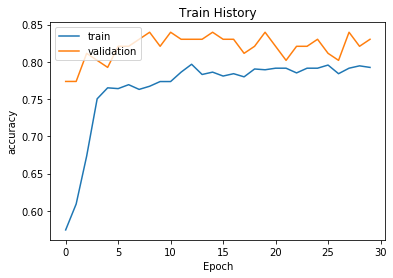

In [30]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    
show_train_history(train_history, "accuracy", "val_accuracy")

### Lose curve of Epoch, page 46

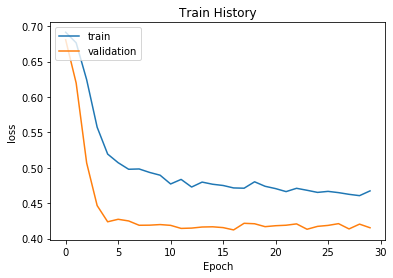

In [31]:
show_train_history(train_history, "loss", "val_loss")

In [33]:
score = model.evaluate(test_features, test_label)
print()
print("accuarcy = ", score[1])
#print("loss = ", score[0])

254/254 [==============================] - 0s 20us/step

accuarcy =  0.8267716765403748


### Jack and Rose, page 48, 49

In [34]:
Jack = pd.Series([0, "Jack", 3, "male", 23, 1, 0, 5, "S"])
Rose = pd.Series([1, "Rose", 1, "female", 20, 1, 0, 100, "S"])

JR_df = pd.DataFrame([list(Jack), list(Rose)],
                    columns=["survived", "name", "pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"])

all_df = pd.concat([all_df, JR_df])
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [35]:
all_Features, Label = PreprocessData(all_df)
all_probability = model.predict(all_Features)
pd = all_df
pd.insert(len(all_df.columns), "probability", all_probability)
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.152288
1,1,Rose,1,female,20.0,1,0,100.0,S,0.972103


### Story Behind Titanic (1/2), page 50 

In [36]:
pd[(pd["survived"] == 0) &(pd["probability"] > 0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.970246
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.970399
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.984129
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.983652
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.970527


In [37]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.979753
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.497806
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.970246
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.342367
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.970399


### Story Behind Titanic (2/2), page 51 

In [38]:
pd[(pd["survived"] == 0) &(pd["probability"] > 0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.970246
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.970399
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.984129
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.983652
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.970527
